Question 1: Application of Differentiation in AI Model Optimization

In [1]:
from sympy import *
x, y = symbols('x y')
L = Function('L')
f = exp(x**2 + y**2)+cos(x*y)
Eq(L(x,y),f)

Eq(L(x, y), exp(x**2 + y**2) + cos(x*y))

Part a

In [2]:
px = diff(f, x)  # partial derivative with respect to x
px

2*x*exp(x**2 + y**2) - y*sin(x*y)

In [3]:
py = diff(f, y)  # partial derivative with respect to y
py

-x*sin(x*y) + 2*y*exp(x**2 + y**2)

Part b

In [4]:
def gradient(x1, y1):
    coordinates = [(x, x1), (y, y1)]
    return [px.subs(coordinates), py.subs(coordinates)]

In [5]:
gradient(1,2)

[-2*sin(2) + 2*exp(5), -sin(2) + 4*exp(5)]

Part c

In [6]:
import matplotlib.pyplot as plt
import numpy as np

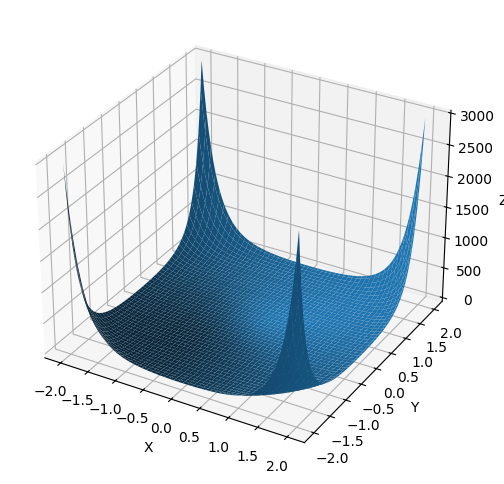

In [7]:
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = lambdify((x, y), f, "numpy")

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X, Y, Z(X, Y), edgecolor='none')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

Part d

Gradient descent is an optimization method where the loss function of a model is minimized by repeatedly adjusting the model parameters.

To minimize the loss function by updating model parameters, the gradient vector is used.

Question 2: Integration for Signal Processing

In [8]:
t = symbols('t')
A = Function('A')
g = 2*t**2*exp(-t)
Eq(A(t), g)

Eq(A(t), 2*t**2*exp(-t))

Part a

In [9]:
integrate(g, (t,0,4))

4 - 52*exp(-4)

Part b

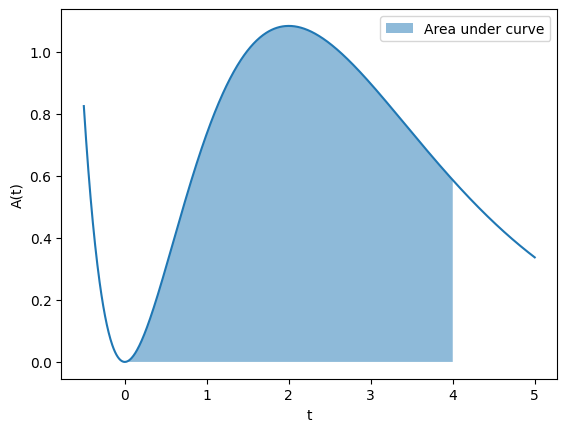

In [10]:
t_vals = np.linspace(-0.5, 5, 1000)
G = lambdify(t, g, "numpy")
plt.plot(t_vals, G(t_vals))
plt.xlabel("t")
plt.ylabel("A(t)")

x_fill = np.linspace(0, 4, 1000)
A_fill = G(x_fill)
plt.fill_between(x_fill, A_fill, alpha=0.5, label="Area under curve")
plt.legend()
plt.show()

Part c

The integral of the signal gives the area under the curve of the signal. This value represents the size or strength of the signal. 

In practical cases the area under the curve may be negative, therefore the signal energy is taken as the area under the squared function.

Question 3: Series Convergence and Numerical Approximation

Part a

In [19]:
f = Function('f')
h = ln(1+x)
Eq(f(x), h)

Eq(f(x), log(x + 1))

In [40]:
s = h.series(x, 0, 11).removeO()
s

-x**10/10 + x**9/9 - x**8/8 + x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x

In [60]:
# with sympy
def get_approximation(x_val):
    if x_val > -1 and x_val <= 1:
        return s.subs(x,x_val).evalf()
    else:
        return "out of range"

In [61]:
get_approximation(0)

0

In [81]:
# with python
def ln_approximation(x_val):
    if x_val > -1 and x_val <= 1:
        result = 0
        for n in range(1, 11):
            term = ((-1) ** (n + 1)) * (x_val ** n) / n
            result += term

        return result
    else:
        return "out of range"

In [63]:
ln_approximation(0)

0.0

Part b

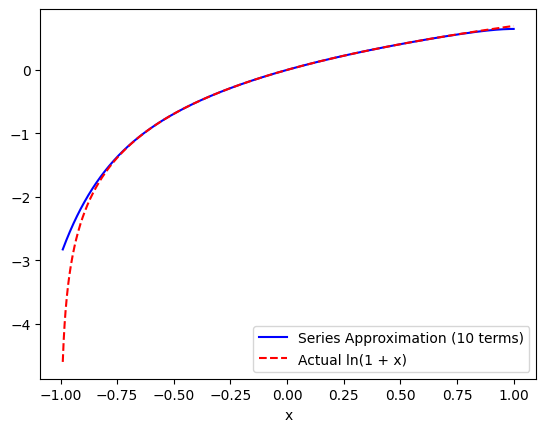

In [82]:
x_vals = np.linspace(-0.99, 1, 1000)
y_approxs = [ln_approximation(a) for a in x_vals]
y_true = [h.subs(x, b) for b in x_vals]

plt.plot(x_vals, y_approxs, label="Series Approximation (10 terms)", color="blue")
plt.plot(x_vals, y_true, label="Actual ln(1 + x)", color="red", linestyle="--")

# Customize the plot
plt.xlabel("x")
# plt.axhline(0, color='black', linewidth=0.8)
# plt.axvline(0, color='black', linewidth=0.8)
plt.legend()

plt.show()

Part c

In [83]:
# when x increases, the approximation error increases

 Question 4: Fourier Transform for Data Filtering